# Goals for Chris 
1. Have gun deaths by assault weapons/rifles/large weapons increased? 
2. Does race play a factor in suicide by gun?

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [68]:
#importations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import figure

In [3]:
df_cleaned = pd.read_csv('Deats_coded.csv')
df_cleaned.head()
#list all ICD 10 codes
df_cleaned['ICD10'].value_counts()

X74     42125
X95     37419
X72     18116
X73      8667
X93      3126
Y350     1560
X94      1519
W34      1027
Y24       728
W32       271
W33       174
Y22       124
Y23        71
Y355       69
Y356       61
Y357        7
Y351        1
Name: ICD10, dtype: int64

In [4]:
#create list of ICD 10 codes associated with large guns
large_guns = ['X73', 'X94', 'W33', 'Y23']
#create an expression that has each ICD10 as a possible condition
large_guns_regex = '|' .join(large_guns)


df_bguns = df_cleaned[df_cleaned['ICD10'].str.contains(large_guns_regex)]

In [5]:
#visualize our value counts to show that the data worked
df_bguns['ICD10'].value_counts()

X73    8667
X94    1519
W33     174
Y23      71
Name: ICD10, dtype: int64

In [6]:
df_bguns.columns
#group by year and ICD10 count, resetting index to keep column names available
bgun_year_cat = df_bguns.groupby(['Data_Year', 'ICD10']).count().reset_index()
#rename column
bgun_year_cat = bgun_year_cat.rename(columns={"Unnamed: 0": "Number of Deaths"})

In [7]:
bgun_year_cat

,Data_Year,ICD10,Number of Deaths,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death
0,2015,W33,64,64,64,64,64,64,64,64,64,64,63,64,64,64,64,64
1,2015,X73,2910,2910,2910,2910,2910,2910,2910,2910,2910,2910,2910,2910,2910,2910,2910,2910
2,2015,X94,475,475,475,475,475,475,475,475,475,475,475,475,475,475,475,475
3,2015,Y23,26,26,26,26,26,26,26,26,26,26,24,26,26,26,26,26
4,2016,W33,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56
5,2016,X73,2892,2892,2892,2892,2892,2892,2892,2892,2892,2892,2892,2892,2892,2892,2892,2892
6,2016,X94,522,522,522,522,522,522,522,522,522,522,522,522,522,522,522,522
7,2016,Y23,21,21,21,21,21,21,21,21,21,21,20,21,21,21,21,21
8,2017,W33,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
9,2017,X73,2865,2865,2865,2865,2865,2865,2865,2865,2865,2865,2865,2865,2865,2865,2865,2865


In [21]:
bgun_year_total = df_bguns.groupby(['Data_Year']).count().reset_index()
bgun_year_total.head()
bgun_year_total = bgun_year_total.rename(columns = {'Unnamed:0' : 'Number of Deaths'})

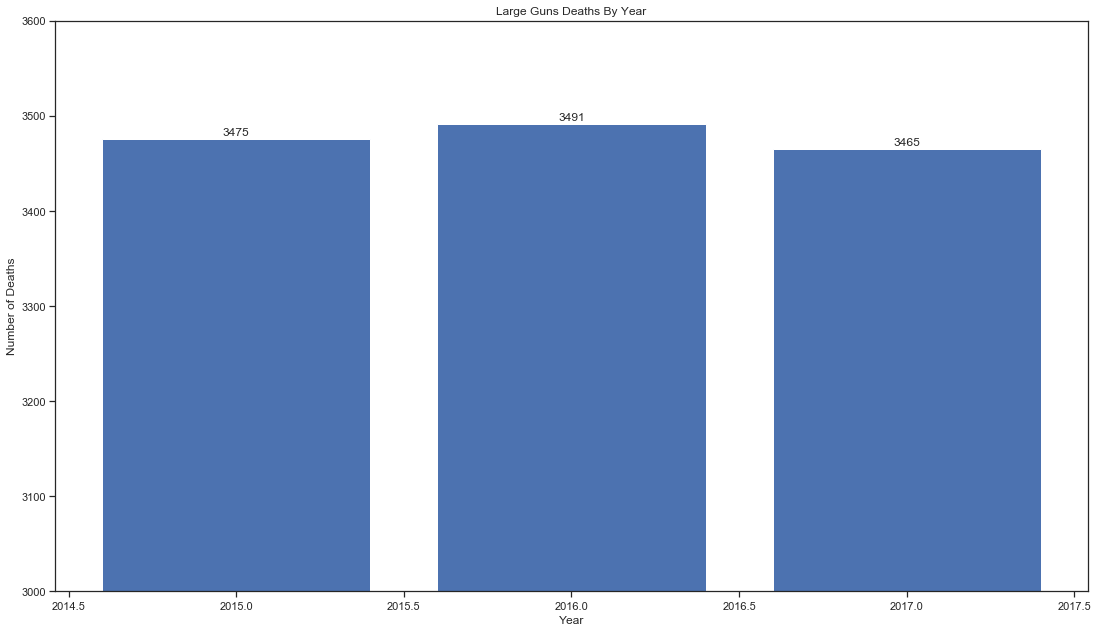

In [87]:
#create axis

x_axis = bgun_year_total['Data_Year']
y_axis = bgun_year_total['Number of Deaths']
colors = np.array(["blue"])




fig, ax = plt.subplots()
def autolabel(rects):
   
   for rect in rects:
       height = rect.get_height()
       ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 2),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom')
rect=ax.bar(x_axis, y_axis, color='r', width=0.35 , align="center")
autolabel(rect)


# Plot
plt.bar(x_axis, y_axis)
plt.title('Large Guns Deaths By Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.ylim(bottom = 3000, top = 3600)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)



In [34]:
bgun_year_total = bgun_year_total.rename(columns = {'Unnamed: 0' : 'Number of Deaths'})
bgun_year_total.head()

,Data_Year,Number of Deaths,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10
0,2015,3475,3475,3475,3475,3475,3475,3475,3475,3475,3475,3472,3475,3475,3475,3475,3475,3475
1,2016,3491,3491,3491,3491,3491,3491,3491,3491,3491,3491,3490,3491,3491,3491,3491,3491,3491
2,2017,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465


In [56]:
#conduct Chi-Square with the years of the biggest difference
# Observed data in a (hypothetical) year where deaths are the same for each year
total = bgun_year_total["Number of Deaths"].sum()
deaths_by_year = bgun_year_total["Number of Deaths"]
print (total_deaths)
observed = pd.Series([deaths_by_year[0], deaths_by_year[1], deaths_by_year[2]], index=["2015", "2016", "2017"])
df = pd.DataFrame([observed]).T
df[1] = total/3
df.columns = ["observed", "expected"]
critical_value = stats.chi2.ppf(q = 0.95, df = 2)

10431


In [57]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=0.0989358642507909, pvalue=0.9517356777874814)

In [97]:
#pivot table for breakdown by ICD10 code
by_death_pivot = bgun_year_cat.pivot(index = "Data_Year", columns="ICD10").reset_index()
by_death_pivot

Data_Year Number of Deaths                Resident_Status             \
ICD10                        W33   X73  X94 Y23             W33   X73  X94   
0          2015               64  2910  475  26              64  2910  475   
1          2016               56  2892  522  21              56  2892  522   
2          2017               54  2865  522  24              54  2865  522   

          Month_Of_Death  ... Race     Hispanic_Origin                 \
ICD10 Y23            W33  ...  X94 Y23             W33   X73  X94 Y23   
0      26             64  ...  475  26              64  2910  475  26   
1      21             56  ...  522  21              56  2892  522  21   
2      24             54  ...  522  24              54  2865  522  24   

      Causes_of_Death                 
ICD10             W33   X73  X94 Y23  
0                  64  2910  475  26  
1                  56  2892  522  21  
2                  54  2865  522  24  

[3 rows x 65 columns]

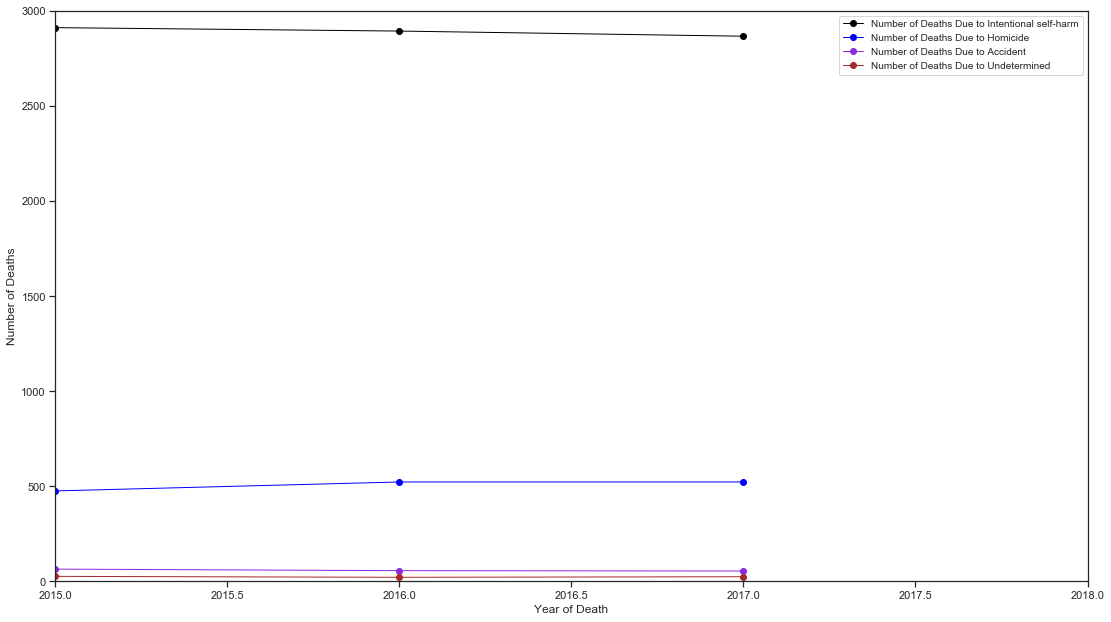

<Figure size 16000x8000 with 0 Axes>

In [71]:
#plot line graph for total number of deaths, then broken down by ICD10

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

#create timepoints list 
timepoints = [2015, 2016, 2017]


#create list of standard error of the means for each drug by time 
#create list of each mean for each drug by time 

codes = ['X73',
         'X94',
         'W33',
         'Y23',]

colors = ['#000000', 
          '#0000FF',
          '#8A2BE2',
          '#A52A2A',]

descriptions = ['Intentional self-harm',
             'Homicide',
             'Accident',
             'Undetermined']


#set figure size, limits, and labels
ax.set_xlabel("Year of Death")
ax.set_ylabel("Number of Deaths")
ax.set_xlim(2015, 2018)
ax.set_ylim(0, 3000)
fig.set_size_inches(18.5, 10.5, forward=True)



#loop through list of each drugs and plot with corresponding color using zip function
for code, color, description in zip(codes, colors, descriptions):

    #get number of deaths for each code
    death_code = by_death_pivot['Number of Deaths'][code].tolist()
    #generate legend description 
    description = "Number of Deaths Due to " + str(description) 
    #ax.errorbar(timepoints, means, yerr=sem, fmt='o', color = color, marker='s', label=description)
    #create actual plot
    plt.plot(timepoints, death_code, linewidth=1, color = color, label=description, marker='o')
    
    

plt.legend(loc="best", fontsize="small", fancybox=True)
figure(num=None, figsize=(160, 80), dpi=100, facecolor='w', edgecolor='k')

plt.show()


# Save the Figure







# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

In [105]:
#conduct Chi-Square for the two largest categories, suicide and homicide
# Observed data in a (hypothetical) year where deaths are the same for each year
total_suicide = by_death_pivot["Number of Deaths"]['X73'].sum()
deaths_by_year = by_death_pivot["Number of Deaths"]['X73']
print (total_suicide)
deaths_by_year
observed = pd.Series([deaths_by_year[0], deaths_by_year[1], deaths_by_year[2]], index=["2015", "2016", "2017"])
df = pd.DataFrame([observed]).T
df[1] = total_suicide/3
df.columns = ["observed", "expected"]
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
print(df)
stats.chisquare(df['observed'], df['expected'])

8667
      observed  expected
2015      2910    2889.0
2016      2892    2889.0
2017      2865    2889.0


Power_divergenceResult(statistic=0.35514018691588783, pvalue=0.8373023078647311)

In [106]:
#conduct Chi-Square for the two largest categories, suicide and homicide
# Observed data in a (hypothetical) year where deaths are the same for each year
total_homicide = by_death_pivot["Number of Deaths"]['X94'].sum()
deaths_by_year = by_death_pivot["Number of Deaths"]['X94']
print (total_homicide)
deaths_by_year
observed = pd.Series([deaths_by_year[0], deaths_by_year[1], deaths_by_year[2]], index=["2015", "2016", "2017"])
df = pd.DataFrame([observed]).T
df[1] = total_homicide/3
df.columns = ["observed", "expected"]
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
print(df)
stats.chisquare(df['observed'], df['expected'])

1519
      observed    expected
2015       475  506.333333
2016       522  506.333333
2017       522  506.333333


Power_divergenceResult(statistic=2.9084924292297565, pvalue=0.23357636400916326)